### Weather Disaster Prediction 
#### DS 3000 Final Project
Members: Luke Abbatessa, Daniel Gilligan, Ruby Potash, Megan Putnam 

Consulted the related data dictionary for assistance throughout the assignment
https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/Storm-Data-Bulk-csv-Format.pdf

Consulted stack overflow for a NotJSONError error
https://stackoverflow.com/questions/32103772/unreadable-notebook-notjsonerrornotebook-does-not-appear-to-be-json-u-n#:~:text=An%20easy%20way%20to%20check%20errors%20in%20json,open%20the%20nb%20again%20as%20usual%20%E2%80%93%20Lucas

Consulted Real Python for a Pep-8 style guide https://realpython.com/python-pep8/

**Data Information**

Data set: https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/

Datasets include three types of data related to weather events recorded for a given year: 
1. Storm details
2. Fatalities
3. Locations 

Naming convention for the csv files are as follows: "StormEvents_[file_type]-ftp_v1.0_d[data_year]_c[creation_date].csv.gz"

In [1]:
# Import the necessary libraries/packages
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

sns.set_style('darkgrid')

In [2]:
# Set data paths and columns of interest
LOCATIONS_2021 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d2021_c20221116.csv.gz"
DETAILS_2021 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2021_c20221116.csv.gz"
FATALITIES_2021 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_fatalities-ftp_v1.0_d2021_c20221116.csv.gz"

LOCATIONS_2020 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d2020_c20220816.csv.gz"
DETAILS_2020 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2020_c20220816.csv.gz"
FATALITIES_2020 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_fatalities-ftp_v1.0_d2020_c20220816.csv.gz"

LOCATIONS_2019 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d2019_c20220425.csv.gz"
DETAILS_2019 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2019_c20220425.csv.gz"
FATALITIES_2019 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_fatalities-ftp_v1.0_d2019_c20220425.csv.gz"

LOCATIONS_2018 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d2018_c20220425.csv.gz"
DETAILS_2018 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2018_c20220425.csv.gz"
FATALITIES_2018 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_fatalities-ftp_v1.0_d2018_c20220425.csv.gz"

LOCATIONS_2017 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d2017_c20220719.csv.gz"
DETAILS_2017 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2017_c20220719.csv.gz"
FATALITIES_2017 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_fatalities-ftp_v1.0_d2017_c20220719.csv.gz"

LOCATIONS_2016 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d2016_c20220719.csv.gz"
DETAILS_2016 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2016_c20220719.csv.gz"
FATALITIES_2016 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_fatalities-ftp_v1.0_d2016_c20220719.csv.gz"

LOCATIONS_2015 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d2015_c20220425.csv.gz"
DETAILS_2015 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2015_c20220425.csv.gz"
FATALITIES_2015 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_fatalities-ftp_v1.0_d2015_c20220425.csv.gz"

LOCATIONS_2014 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d2014_c20221018.csv.gz"
DETAILS_2014 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2014_c20221018.csv.gz"
FATALITIES_2014 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_fatalities-ftp_v1.0_d2014_c20221018.csv.gz"

LOCATIONS_2013 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d2013_c20220425.csv.gz"
DETAILS_2013 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2013_c20220425.csv.gz"
FATALITIES_2013 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_fatalities-ftp_v1.0_d2013_c20220425.csv.gz"

LOCATIONS_2012 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d2012_c20220425.csv.gz"
DETAILS_2012 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2012_c20220425.csv.gz"
FATALITIES_2012 = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_fatalities-ftp_v1.0_d2012_c20220425.csv.gz"


COLS_OF_INTEREST = [
    "EVENT_ID", "BEGIN_YEARMONTH", "END_YEARMONTH", "EVENT_TYPE", 
    "CZ_TYPE", "EPISODE_NARRATIVE", "EVENT_NARRATIVE", "INJURIES_DIRECT", 
    "DEATHS_DIRECT", "DAMAGE_PROPERTY", "DAMAGE_CROPS", "TOR_F_SCALE", 
    "TOR_LENGTH", "TOR_WIDTH", "TOR_OTHER_WFO", "TOR_OTHER_CZ_STATE", 
    "TOR_OTHER_CZ_FIPS", "TOR_OTHER_CZ_NAME"
]

In [3]:
# Instantiate helper functions 
def merge_dfs(df1, df2, col):
    """Merge two dataframes on a common column"""
    joined_df = pd.merge(df1, df2, on=col)
    return joined_df


def import_year_data(loc_csv, detail_csv, fatal_csv, merge_on="EVENT_ID"): 
    """Return df of merged location, detail, and fatalities csv files 
    for a given year (default is merge on event ID)
    """
    loc_df = pd.read_csv(loc_csv)
    detail_df = pd.read_csv(detail_csv)
    fatal_df = pd.read_csv(fatal_csv)
    
    loc_detail_df = merge_dfs(loc_df, detail_df, merge_on)
    joined_df = merge_dfs(loc_detail_df, fatal_df, merge_on)
    
    return joined_df


def eval_missing_data(df, include_col="all"): 
    """Evaluate missing data by row and columns for given dataframe and 
    print output; specify list of columns to include in include_col, 
    otherwise will include all
    """
    if include_col is not "all":
        df = df[include_col] 
        
    print("Shape:", df.shape)
    print("\nData missing per col:", 
          df.isnull().sum().sort_values(ascending=False), sep="\n")
    print("\nNumber of rows (right) missing X columns (left)):", 
          df.isnull().sum(axis=1).value_counts(), sep="\n")
    
    
def scrutinize_data(df, col_lst):
    """Observe each column's values and their frequencies"""
    for col in col_lst:
        print(df[col].value_counts(dropna=False))

        
def split_date(df, date_col_name, new_names):
    """Split yearmonth column into separate year and month columns; 
    return updated df with given naming convention 
    (new_names: list in order of year, month col names)
    """
    df[new_names[0]] = df[date_col_name].str[:4]
    df[new_names[1]] = df[date_col_name].str[4:]
    return df


def get_unique_col_vals(df):
    """Gather unique values from each dataframe column"""
    for col in df:
        print(df[col].unique())
    
    
def identify_data_dims(df):
    """Investigate the dimensions of a dataframe"""
    data_dims = df.shape
    return data_dims
    
    
def perform_deletion(df):
    """Delete rows with missing variables""" 
    df = df.dropna()
    return df


def run_random_forest_regressor(
        n_estimators, 
        max_features, 
        random_state, 
        X_train, 
        y_train, 
        X_test, 
        y_test):
    """Run a Random Forest Regressor"""
    rf_model = RandomForestRegressor(
            n_estimators=n_estimators, 
            max_features=max_features, 
            random_state=random_state)
    rf_model.fit(X_train, y_train)
    
    coeff_deter = rf_model.score(X_train, y_train)
    
    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred).round(2)
    
    return rf_model, mse, coeff_deter

<>:27: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:27: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/c8/v32nm0sj6396s8t869hp4kgr0000gp/T/ipykernel_72775/3569776193.py:27: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if include_col is not "all":


Consulted Statistics Globe to confirm the process of merging two Pandas DataFrames
https://statisticsglobe.com/merge-pandas-dataframes-based-on-particular-column-python#:~:text=Within%20this%20function%2C%20we%20have%20to%20specify%20the,on%20%3D%20%22col%22%29%20print%28data_join%29%20%23%20Print%20merged%20DataFrame

In [4]:
# Merge data type files for each year and concatenate into one df
df_2021 = import_year_data(LOCATIONS_2021, DETAILS_2021, FATALITIES_2021)
df_2020 = import_year_data(LOCATIONS_2020, DETAILS_2020, FATALITIES_2020)
df_2019 = import_year_data(LOCATIONS_2019, DETAILS_2019, FATALITIES_2019)
df_2018 = import_year_data(LOCATIONS_2018, DETAILS_2018, FATALITIES_2018)
df_2017 = import_year_data(LOCATIONS_2017, DETAILS_2017, FATALITIES_2017)
df_2016 = import_year_data(LOCATIONS_2016, DETAILS_2016, FATALITIES_2016)
df_2015 = import_year_data(LOCATIONS_2015, DETAILS_2015, FATALITIES_2015)
df_2014 = import_year_data(LOCATIONS_2014, DETAILS_2014, FATALITIES_2014)
df_2013 = import_year_data(LOCATIONS_2013, DETAILS_2013, FATALITIES_2013)
df_2012 = import_year_data(LOCATIONS_2012, DETAILS_2012, FATALITIES_2012)

joined_df = pd.concat([
    df_2021, df_2020, df_2019, df_2018, df_2017, df_2016, df_2015, 
    df_2014, df_2013, df_2012
]) 

print("Below is the dataframe consisting of the merged dataframes "
      "of storm locations, details, and fatalities data from 2012 to 2021.")
display(joined_df)

Below is the dataframe consisting of the merged dataframes of storm locations, details, and fatalities data from 2012 to 2021.


,YEARMONTH,EPISODE_ID_x,EVENT_ID,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,...,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
0,202102,155272,936331,1,2.96,SSW,KAHAKULOA,20.9611,-156.5692,2057666,...,202102,18,0,42429,I,02/18/2021 00:00:00,26.0,F,In Water,202102.0
1,202102,155272,936331,2,1.58,N,KIPAHULU,20.6725,-156.0739,2040350,...,202102,18,0,42429,I,02/18/2021 00:00:00,26.0,F,In Water,202102.0
2,202102,155279,936389,1,1.60,NW,WAIHEE,20.9455,-156.5385,2056730,...,202102,27,0,42430,I,02/27/2021 00:00:00,27.0,M,In Water,202102.0
3,202102,155279,936389,1,1.60,NW,WAIHEE,20.9455,-156.5385,2056730,...,202102,27,0,42431,I,02/27/2021 00:00:00,NaN,M,In Water,202102.0
4,202102,155279,936389,2,1.01,NNW,KIPAHULU,20.6640,-156.0743,2039840,...,202102,27,0,42430,I,02/27/2021 00:00:00,27.0,M,In Water,202102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,201203,61699,369430,2,2.64,ESE,WIGGONSVILLE,38.9035,-84.0357,3854210,...,201203,2,0,17960,D,03/02/2012 00:00:00,54.0,M,Mobile/Trailer Home,201203.0
423,201203,61699,369430,2,2.64,ESE,WIGGONSVILLE,38.9035,-84.0357,3854210,...,201203,2,0,17962,D,03/02/2012 00:00:00,58.0,M,Mobile/Trailer Home,201203.0
424,201203,61699,369430,2,2.64,ESE,WIGGONSVILLE,38.9035,-84.0357,3854210,...,201203,2,0,17961,D,03/02/2012 00:00:00,64.0,F,Permanent Home,201203.0
425,201203,61699,370174,1,0.99,NE,WEST UNION,38.8110,-83.5182,3848660,...,201203,2,0,18120,D,03/02/2012 00:00:00,99.0,F,Mobile/Trailer Home,201203.0


After merging the locations, details, and fatalities .csv files for the years 2012 through 2021 into dataframes, and after merging the ten merged dataframes themselves into one joined dataframe, one can see that the resulting joined dataframe has 7,056 rows indicating 7,056 different storm events, as well as 71 columns indicating 71 different attributes that a storm event may or may not have.

In [5]:
# Remove duplicate rows from the df
print("Dimensions of dataframe before duplicates are dropped:", 
      joined_df.shape)
joined_df.drop_duplicates(inplace=True)

Dimensions of dataframe before duplicates are dropped: (7056, 71)


In [6]:
# Evaluate missing data counts for columns of interest and rows 
print("Below are the dimensions of the dataframe "
      "after duplicates are dropped.")
eval_missing_data(joined_df, include_col=COLS_OF_INTEREST)

Below are the dimensions of the dataframe after duplicates are dropped.
Shape: (7056, 18)

Data missing per col:
TOR_OTHER_CZ_NAME     6516
TOR_OTHER_CZ_FIPS     6516
TOR_OTHER_CZ_STATE    6516
TOR_OTHER_WFO         6516
TOR_F_SCALE           6086
TOR_WIDTH             6086
TOR_LENGTH            6086
DAMAGE_PROPERTY        369
DAMAGE_CROPS           282
EVENT_NARRATIVE         31
DEATHS_DIRECT            0
BEGIN_YEARMONTH          0
INJURIES_DIRECT          0
EPISODE_NARRATIVE        0
CZ_TYPE                  0
EVENT_TYPE               0
END_YEARMONTH            0
EVENT_ID                 0
dtype: int64

Number of rows (right) missing X columns (left)):
7    5887
4     332
0     316
1     194
8     112
9      87
5      54
6      44
2      30
dtype: int64


There were no duplicate records present. Missing data shows that tornado specific feature columns ("TOR_\*") are missing from many of the records, due to not being applicable for event type. Property damage and crop damage variables are only other features of interest with a significant number of missing values.

In [7]:
# Check for invalid data
print("Below are the unique values by column and their frequencies.")
scrutinize_data(joined_df, COLS_OF_INTEREST)

Below are the unique values by column and their frequencies.
720861    304
505782    172
643304     96
737349     84
581658     70
         ... 
762346      1
506440      1
506947      1
524765      1
839173      1
Name: EVENT_ID, Length: 1508, dtype: int64
201708    558
201505    269
201512    248
201606    234
201305    230
         ... 
201411      4
201211      4
201710      2
202010      2
201712      1
Name: BEGIN_YEARMONTH, Length: 119, dtype: int64
201708    558
201505    269
201512    248
201606    234
201305    230
         ... 
201411      4
201211      4
201710      2
202010      2
201712      1
Name: END_YEARMONTH, Length: 119, dtype: int64
Flash Flood                 3537
Flood                       1293
Tornado                      970
Thunderstorm Wind            436
Debris Flow                  339
Lightning                    270
Heavy Rain                   103
Marine Strong Wind            46
Marine Thunderstorm Wind      41
Hail                           9
Waterspo

Based on our exploration of the data, we did not seem to come across any invalid values (e.g. each of the unique values for each of the 18 columns in the dataframe make sense in the context of ths situation).

With that being said, we have not deemed it necessary to filter out any rows from the dataframe.

In [8]:
# Filter the joined df based on the columns of interest
filtered_df = joined_df[COLS_OF_INTEREST]
print("Below are the first few rows of the dataframe "
      "filtered for the columns of interest.")
display(filtered_df.head(5))

print("Below are the data types of the columns of interest.")
print(filtered_df.dtypes)

Below are the first few rows of the dataframe filtered for the columns of interest.


,EVENT_ID,BEGIN_YEARMONTH,END_YEARMONTH,EVENT_TYPE,CZ_TYPE,EPISODE_NARRATIVE,EVENT_NARRATIVE,INJURIES_DIRECT,DEATHS_DIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME
0,936331,202102,202102,Heavy Rain,C,"A surface front stalled near Kauai, along with...",A 26-year-old woman died when she was swept ou...,0,0,0.00K,0.00K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,936331,202102,202102,Heavy Rain,C,"A surface front stalled near Kauai, along with...",A 26-year-old woman died when she was swept ou...,0,0,0.00K,0.00K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,936389,202102,202102,Heavy Rain,C,Gusty trade winds helped keep showers moving a...,Two hikers went missing along the Waikamoi Tra...,0,0,0.00K,0.00K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,936389,202102,202102,Heavy Rain,C,Gusty trade winds helped keep showers moving a...,Two hikers went missing along the Waikamoi Tra...,0,0,0.00K,0.00K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,936389,202102,202102,Heavy Rain,C,Gusty trade winds helped keep showers moving a...,Two hikers went missing along the Waikamoi Tra...,0,0,0.00K,0.00K,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Below are the data types of the columns of interest.
EVENT_ID                int64
BEGIN_YEARMONTH         int64
END_YEARMONTH           int64
EVENT_TYPE             object
CZ_TYPE                object
EPISODE_NARRATIVE      object
EVENT_NARRATIVE        object
INJURIES_DIRECT         int64
DEATHS_DIRECT           int64
DAMAGE_PROPERTY        object
DAMAGE_CROPS           object
TOR_F_SCALE            object
TOR_LENGTH            float64
TOR_WIDTH             float64
TOR_OTHER_WFO          object
TOR_OTHER_CZ_STATE     object
TOR_OTHER_CZ_FIPS     float64
TOR_OTHER_CZ_NAME      object
dtype: object


After filtering the dataframe based on the columns of interest and observing the data types of these columns, we noticed that certain columns have unsuitable data types.

The variables "EVENT_TYPE," "CZ_TYPE," "EPISODE_NARRATIVE," "EVENT_NARRATIVE," "TOR_F_SCALE," "TOR_OTHER_WFO," TOR_OTHER_CZ_STATE," and "TOR_OTHER_CZ_NAME" consist of object-type instances, however they should consist of strings.

The variables "DAMAGE_PROPERTY" and "DAMAGE_CROPS" consist of object-type instances, however they should consist of floats.

Consulted stack overflow for making a new column from the string slice of another
https://stackoverflow.com/questions/25789445/pandas-make-new-column-from-string-slice-of-another-column

In [9]:
# Change BEGIN_YEARMONTH and END_YEARMONTH from objects to strings
dtype_dict = {"BEGIN_YEARMONTH": pd.StringDtype(), 
              "END_YEARMONTH": pd.StringDtype()}
filtered_df = filtered_df.astype(dtype_dict)

# Separate BEGIN_YEARMONTH and END_YEARMONTH into year and month columns
filtered_df = split_date(
        filtered_df, 
        "BEGIN_YEARMONTH", 
        ["BEGIN_YEAR", "BEGIN_MONTH"]) 
filtered_df = split_date(
        filtered_df, 
        "END_YEARMONTH", 
        ["END_YEAR", "END_MONTH"]) 

# Drop the now-unnecessary columns BEGIN_YEARMONTH and END_YEARMONTH
filtered_df = filtered_df.drop(["BEGIN_YEARMONTH", "END_YEARMONTH"], axis=1)

print("Below are the columns of interest, with the begin and end "
      "year and month columns.")
print(" ")
print(filtered_df.columns)
print(" ")

print("Below are the first few rows of the dataframe, with the new columns.")
display(filtered_df.head(5))

Below are the columns of interest, with the begin and end year and month columns.
 
Index(['EVENT_ID', 'EVENT_TYPE', 'CZ_TYPE', 'EPISODE_NARRATIVE',
       'EVENT_NARRATIVE', 'INJURIES_DIRECT', 'DEATHS_DIRECT',
       'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'TOR_F_SCALE', 'TOR_LENGTH',
       'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS',
       'TOR_OTHER_CZ_NAME', 'BEGIN_YEAR', 'BEGIN_MONTH', 'END_YEAR',
       'END_MONTH'],
      dtype='object')
 
Below are the first few rows of the dataframe, with the new columns.


,EVENT_ID,EVENT_TYPE,CZ_TYPE,EPISODE_NARRATIVE,EVENT_NARRATIVE,INJURIES_DIRECT,DEATHS_DIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_YEAR,BEGIN_MONTH,END_YEAR,END_MONTH
0,936331,Heavy Rain,C,"A surface front stalled near Kauai, along with...",A 26-year-old woman died when she was swept ou...,0,0,0.00K,0.00K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,02,2021,02
1,936331,Heavy Rain,C,"A surface front stalled near Kauai, along with...",A 26-year-old woman died when she was swept ou...,0,0,0.00K,0.00K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,02,2021,02
2,936389,Heavy Rain,C,Gusty trade winds helped keep showers moving a...,Two hikers went missing along the Waikamoi Tra...,0,0,0.00K,0.00K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,02,2021,02
3,936389,Heavy Rain,C,Gusty trade winds helped keep showers moving a...,Two hikers went missing along the Waikamoi Tra...,0,0,0.00K,0.00K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,02,2021,02
4,936389,Heavy Rain,C,Gusty trade winds helped keep showers moving a...,Two hikers went missing along the Waikamoi Tra...,0,0,0.00K,0.00K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,02,2021,02


In [10]:
# Change the data types of certain columns
dtype_dict = {"EVENT_TYPE": pd.StringDtype(), 
              "CZ_TYPE": pd.StringDtype(), 
              "EPISODE_NARRATIVE": pd.StringDtype(), 
              "EVENT_NARRATIVE": pd.StringDtype(),
              "TOR_F_SCALE": pd.StringDtype(), 
              "TOR_LENGTH": float, 
              "TOR_WIDTH": float,
              "TOR_OTHER_WFO": pd.StringDtype(),
              "TOR_OTHER_CZ_STATE": pd.StringDtype(), 
              "TOR_OTHER_CZ_FIPS": float, 
              "TOR_OTHER_CZ_NAME": pd.StringDtype(),
              "BEGIN_YEAR": int,
              "BEGIN_MONTH": int,
              "END_YEAR": int,
              "END_MONTH": int}

filtered_df = filtered_df.astype(dtype_dict)
print("Below are the data types of the dataframe's columns after "
      "data types have been changed.")
print(filtered_df.dtypes)

Below are the data types of the dataframe's columns after data types have been changed.
EVENT_ID                int64
EVENT_TYPE             string
CZ_TYPE                string
EPISODE_NARRATIVE      string
EVENT_NARRATIVE        string
INJURIES_DIRECT         int64
DEATHS_DIRECT           int64
DAMAGE_PROPERTY        object
DAMAGE_CROPS           object
TOR_F_SCALE            string
TOR_LENGTH            float64
TOR_WIDTH             float64
TOR_OTHER_WFO          string
TOR_OTHER_CZ_STATE     string
TOR_OTHER_CZ_FIPS     float64
TOR_OTHER_CZ_NAME      string
BEGIN_YEAR              int64
BEGIN_MONTH             int64
END_YEAR                int64
END_MONTH               int64
dtype: object


Although certain columns in the dataframe were changed to suitable data types, it should be noted that "DAMAGE_PROPERTY" and "DAMAGE_CROPS" still consist of unsuitable data types.

In [11]:
# Replace "K" with (3 zeros - 2), "M" with (6 - 2), 
# "B" with (9 - 2), and "." with "" for DAMAGE_PROPERTY and DAMAGE_CROPS
# 
# There are already 2 0's after a decimal point for both columns
letter_num = {"K": "0" * (3-2), "M": "0" * (6-2), "B": "0" * (9-2), ".": ""}


filtered_df["DAMAGE_PROPERTY"] \
= filtered_df["DAMAGE_PROPERTY"].str.translate(str.maketrans(letter_num))

filtered_df["DAMAGE_PROPERTY"] \
= pd.to_numeric(filtered_df["DAMAGE_PROPERTY"])

filtered_df["DAMAGE_CROPS"] \
= filtered_df["DAMAGE_CROPS"].str.translate(str.maketrans(letter_num))

filtered_df["DAMAGE_CROPS"] \
= pd.to_numeric(filtered_df["DAMAGE_CROPS"])


print("Below are the unique values per column after property and crop damage "
      "values have been converted to numeric data.")
get_unique_col_vals(filtered_df)
print(" ")

print("Below are the data types of the columns, including "
      "the changed data types for the property and crop damage columns.")
print(filtered_df.dtypes)

Below are the unique values per column after property and crop damage values have been converted to numeric data.
[936331 936389 975717 ... 369474 369430 370174]
<StringArray>
[              'Heavy Rain',                'Lightning',
              'Flash Flood',                  'Tornado',
        'Thunderstorm Wind',       'Marine Strong Wind',
                    'Flood',              'Debris Flow',
                     'Hail', 'Marine Thunderstorm Wind',
               'Waterspout',         'Marine High Wind',
               'Dust Devil']
Length: 13, dtype: string
<StringArray>
['C', 'Z']
Length: 2, dtype: string
<StringArray>
[                                                                                                                                                                                                                                                                                                                                                                          

[ nan 113.  19.  61. 155. 105. 157. 143.  33. 107. 177. 183. 189. 159.
  31.  73.  91.  11.  77.  85.  17. 119.  79. 347.  83. 215.   5.  69.
 129. 321.  75. 111. 379. 149. 181.  29.  49.   7.  81.   9. 139. 397.
 123.  21.  95. 127.  45. 145.  39. 179.  57. 103. 151. 203. 115. 185.
  59. 223. 175.  99.  15.]
<StringArray>
[         <NA>,     'FAYETTE',    'CHEROKEE',    'EDMONSON',      'MARION',
     'HICKMAN',    'MARSHALL',        'LYON',    'CALDWELL',     'HOPKINS',
  'MUHLENBERG',        'OHIO',      'WILSON',       'SMITH',   'COVINGTON',
      'JASPER',       'LAMAR',     'BRADLEY',     'PICKENS',   'HUMPHREYS',
    'LAWRENCE',     'CALHOUN',     'WEBSTER',     'RAPIDES', 'NACOGDOCHES',
     'GUTHRIE',   'LIMESTONE',    'MUSCOGEE',       'ATOKA',     'DUNKLIN',
  'ROCKINGHAM',   'BALTIMORE',       'POSEY',    'RANDOLPH',       'WORTH',
        'COOK',     'BERRIEN',       'PERRY',       'RAINS',        'RUSK',
     'WASHITA',       'SURRY',        'COAL',      'DEKALB',       

Through the process of converting the values of the columns "DAMAGE_PROPERTY" and "DAMAGE_CROPS" to numerical instances, the data types of these two columns were changed to floats (e.g. suitable data types).

In [12]:
# Filter the df by tornadoes
tornado_df = filtered_df[filtered_df["EVENT_TYPE"] == "Tornado"]

print("Below are the first few rows of the dataframe filtered for tornadoes.")
display(tornado_df.head(5))

Below are the first few rows of the dataframe filtered for tornadoes.


,EVENT_ID,EVENT_TYPE,CZ_TYPE,EPISODE_NARRATIVE,EVENT_NARRATIVE,INJURIES_DIRECT,DEATHS_DIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_YEAR,BEGIN_MONTH,END_YEAR,END_MONTH
14,979869,Tornado,C,A tornado that touched down in Jefferson Count...,An EF-1 tornado was confirmed to have occurred...,1,1,20000.0,0.0,EF1,0.58,260.0,<NA>,<NA>,NaN,<NA>,2021,10,2021,10
15,979869,Tornado,C,A tornado that touched down in Jefferson Count...,An EF-1 tornado was confirmed to have occurred...,1,1,20000.0,0.0,EF1,0.58,260.0,<NA>,<NA>,NaN,<NA>,2021,10,2021,10
150,972354,Tornado,C,The remnants of Hurricane Ida impacted the mid...,A semi-discrete supercell thunderstorm began t...,2,1,5000000.0,0.0,EF2,8.28,400.0,<NA>,<NA>,NaN,<NA>,2021,9,2021,9
151,972354,Tornado,C,The remnants of Hurricane Ida impacted the mid...,A semi-discrete supercell thunderstorm began t...,2,1,5000000.0,0.0,EF2,8.28,400.0,<NA>,<NA>,NaN,<NA>,2021,9,2021,9
154,941340,Tornado,C,A very moist and moderately unstable airmass o...,A National Weather Service survey determined t...,0,0,20000000.0,NaN,EF4,21.72,1850.0,FFC,GA,113.0,FAYETTE,2021,3,2021,3


In [13]:
# Gauge the missing values in the tornado df
eval_missing_data(tornado_df)

Shape: (970, 20)

Data missing per col:
TOR_OTHER_CZ_NAME     430
TOR_OTHER_CZ_FIPS     430
TOR_OTHER_CZ_STATE    430
TOR_OTHER_WFO         430
DAMAGE_PROPERTY       234
DAMAGE_CROPS          162
EVENT_ID                0
TOR_WIDTH               0
END_YEAR                0
BEGIN_MONTH             0
BEGIN_YEAR              0
TOR_LENGTH              0
EVENT_TYPE              0
TOR_F_SCALE             0
DEATHS_DIRECT           0
INJURIES_DIRECT         0
EVENT_NARRATIVE         0
EPISODE_NARRATIVE       0
CZ_TYPE                 0
END_MONTH               0
dtype: int64

Number of rows (right) missing X columns (left)):
4    332
0    316
1    194
5     54
6     44
2     30
dtype: int64


As can be seen above, even after filtering the dataframe by solely tornadoes, it is still the case that the tornado specific columns, as well as the columns signifying property and crop damages, hold multiple missing values (in some cases, nearly half of a column's values constitute missing values). 

In [14]:
# Perform deletion and observe tornado_df's dimensions 
# before and after
initial_dims = identify_data_dims(tornado_df)
print("Below are the initial dimensions of tornado_df.")
print(initial_dims)
print(" ")

tornado_df = perform_deletion(tornado_df)

final_dims = identify_data_dims(tornado_df)
print("Below are the dimensions of tornado_df after "
      "missing values are deleted.")
print(final_dims)
print(" ")

print("After deletion,", initial_dims[0] - final_dims[0], "rows "
      "were removed from the data.")

Below are the initial dimensions of tornado_df.
(970, 20)
 
Below are the dimensions of tornado_df after missing values are deleted.
(316, 20)
 
After deletion, 654 rows were removed from the data.


After deleting every row in the dataframe with at least one missing value, 654 rows were removed from the data. Although this was a significant chunk of the data, we decided that 316 rows was enough data to use to perform our algorithms on.

In [15]:
# Implement Random Forest Regression

# Encode f scale rating 
tornado_df = pd.get_dummies(tornado_df, columns=["TOR_F_SCALE"])

# Partition the data
X = tornado_df.drop(["DAMAGE_PROPERTY"], axis=1)
y = tornado_df["DAMAGE_PROPERTY"]

X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=0.25, 
        random_state=44)

# Filter the input training and test sets for the columns to be used
# to predict property damage
selected_features = [
    "INJURIES_DIRECT", "DEATHS_DIRECT", "TOR_LENGTH", "TOR_WIDTH", 
    "BEGIN_MONTH", "END_MONTH", "TOR_F_SCALE_EF1", "TOR_F_SCALE_EF2", 
    "TOR_F_SCALE_EF3", "TOR_F_SCALE_EF4"
]

X_train = X_train[selected_features]
X_test = X_test[selected_features]



# Hyper tune n_estimators of RF model for best results (measured by R^2 and MSE)
param_dict = {'n_estimators': np.arange(10, 100, 10)}

# initialize Grid Search with RF model and cross validation 
cv = 5                            # cross validation folds
rf_model = RandomForestRegressor(  
            random_state=44)

rf_grid = GridSearchCV(estimator = rf_model, scoring = ['neg_mean_squared_error', 'r2'], refit='r2', param_grid = param_dict, cv=cv, return_train_score = True)
rf_grid.fit(X_train, y_train)

# compare train and test set cross validation results 
cv_df = pd.DataFrame(rf_grid.cv_results_, 
                     columns=['param_n_estimators', 
                              'mean_train_r2',  
                              'std_train_r2', 
                              'mean_test_r2', 
                              'std_test_r2',
                              'mean_train_neg_mean_squared_error',
                              'mean_test_neg_mean_squared_error', 
                              ]).round(decimals=3)
cv_df = cv_df.rename(mapper={'param_n_estimators':'n_estimators', 
                              'mean_train_r2':'Mean train R^2', 
                              'mean_train_neg_mean_squared_error':'Mean train MSE', 
                              'std_train_r2':'SD train R^2', 
                              'mean_test_r2':'Mean test R^2', 
                              'mean_test_neg_mean_squared_error':'Mean test MSE', 
                              'std_test_r2':'SD test R^2'}, axis=1)

cv_df = cv_df.sort_values('Mean test R^2', ascending=False)
cv_df['Mean train MSE'] = abs(cv_df['Mean train MSE'])
cv_df['Mean test MSE'] = abs(cv_df['Mean test MSE'])
cv_df.head(5)


,n_estimators,Mean train R^2,SD train R^2,Mean test R^2,SD test R^2,Mean train MSE,Mean test MSE
2,30,0.994,0.005,0.982,0.012,1.685005e+14,5.928215e+14
0,10,0.992,0.006,0.979,0.018,2.191918e+14,8.066930e+14
4,50,0.992,0.009,0.978,0.020,1.995380e+14,8.461097e+14
1,20,0.992,0.007,0.977,0.019,2.207998e+14,8.537270e+14
5,60,0.991,0.009,0.977,0.022,2.231953e+14,9.296160e+14


Optimal tree number: 30
The coefficient of determination of the model with 30 trees is: 0.98
The mse of the model with 30 trees is 806692954330851.2 

The mean value for the target varable is : 60,507,658.23
The median value for the target varable is: 2,000,000.0


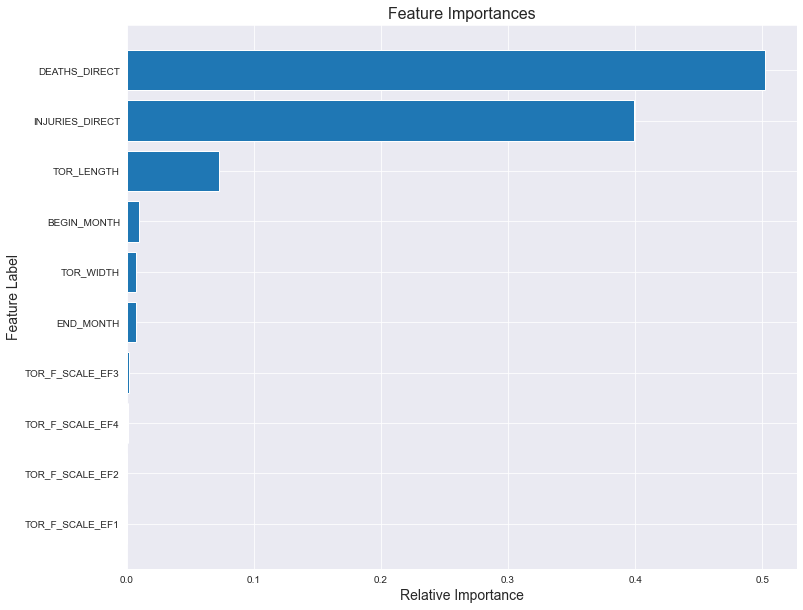

In [16]:
# Plot a feature importance chart with the optimized RFR model
best_n = rf_grid.best_params_['n_estimators']
sel_rf_model, mse, coeff_deter = run_random_forest_regressor(
        best_n, 
        "auto", 
        44, 
        X_train, 
        y_train, 
        X_test, 
        y_test)

print("Optimal tree number:", best_n)
print(f"The coefficient of determination of the model with {best_n} trees is: {round(cv_df['Mean test R^2'][0],2)}")
print(f"The mse of the model with {best_n} trees is {round(cv_df['Mean test MSE'][0],2)} \n")

# Generate the mean and the median for the target
mean = round(y.mean(), 2)
median = y.median()
print("The mean value for the target varable is : " + f"{mean:,}")
print("The median value for the target varable is: " + f"{median:,}")


sorted_idx = sel_rf_model.feature_importances_.argsort()
plt.figure(figsize=(12,10))
plt.barh(X_train.columns[sorted_idx], 
         sel_rf_model.feature_importances_[sorted_idx])
plt.title("Feature Importances", fontsize=16)
plt.xlabel("Relative Importance", fontsize=14)
plt.ylabel("Feature Label", fontsize=14)
plt.show()


Consulted Great Learning for more information about mean squared error
https://www.mygreatlearning.com/blog/mean-square-error-explained/

Consulted CFI for more information about the coefficient of determination
https://corporatefinanceinstitute.com/resources/data-science/coefficient-of-determination/

One of the three algorithms that we implemented was a Random Forest Regressor; we chose to implement a Random Forest Regressor and not a Random Forest Classifier because the variable we were trying to predict ("DAMAGE_PROPERTY") represented a numerical variable.

One hyperparameter that we decided to tune was "n_estimators," which indicates the number of trees included in the model. Specifically, we trained the model with 500 trees, 100 trees, and 50 trees, and the differing numbers of trees had an influence on the two metrics we used to gauge the performance of the model: mean squared error (MSE) and the coefficient of determination.

MSE can be defined as the mean or average of the square of the difference between actual values and estimated values. MSE can be used to find a line-of-best-fit, however it is sensitive to outliers. The larger the MSE, the farther that estimated values are from their actual counterparts; the smaller the MSE, the better that the estimated values resemble the actual values.

The coefficient of determination (also called r-squared) determines the proportion of variance in the dependent variable (the variable representative of the y-axis) that can be explained by the independent variable (the variable representative of the x-axis). In other words, the coefficient of determination indicates how well the data fits the model. The closer the r-squared value is to 1, the more of an indication that the data is a good fit for the model.

Beginning with the implementation of the Random Forest Regressor with 500 trees, the MSE was roughly 31,336,158,626,093.75, while the r-squared value was roughly 0.9996. Although the r-squared value being high is a good thing, the same cannot be said for the MSE, however this was the first implementation of the model, so there was room for improvement. Thus "n_estimators" was changed to 100.

Looking at the implementation of the model with 100 trees, the MSE was roughly 35,693,091,472,187.5, while the r-squared value was roughly 0.9995. Both the MSE and the r-squared value for this implementation of the model were worse than the MSE and the r-squared value for the implementation of the model with 500 trees, thus "n_estimators" was once again tuned, this time to 50.

Looking at the implementation of the model with 50 trees, the MSE was roughly 29,200,251,705,625.0, while the r-squared value was roughly 0.9995. This MSE value was better than the previous two MSE values, however it is still considerably high; this r-squared value was consistent with the previous two r-squared values. Overall, the high MSE for each of the three models is an indication that a Random Forest Regressor may not be the best model for predicting "DAMAGE_PROPERTY" from tornadoes based on "INJURIES_DIRECT," "DEATHS_DIRECT," "TOR_F_SCALE," "TOR_LENGTH," "TOR_WIDTH," "BEGIN_MONTH," and "END_MONTH."

Lastly, looking at the horizontal bar chart above, it illustrates which features were most important in predicting "DAMAGE_PROPERTY." As one can see, the top three features were "DEATHS_DIRECT," "INJURIES_DIRECT," and "TOR_LENGTH," with relative importance scores of roughly 0.52, 0.38, and 0.068, respectively.

***Note: Although it is customary to round all numeric calculations to 2 decimal places, had we done this for the coefficient of determination values for the three different implementations of the Random Forest Regressor, we wouldn't have been able to differentiate between the performances of the implementations.***

In [19]:
# Implement KNN Regression

# Partition the data
X = tornado_df.drop(["DAMAGE_PROPERTY"], axis=1)
y = tornado_df["DAMAGE_PROPERTY"]

X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=0.25, 
        random_state=44)

# Filter the input training and test sets for the columns to be used
# to predict property damage
selected_features = [
    "INJURIES_DIRECT", "DEATHS_DIRECT", "TOR_LENGTH", "TOR_WIDTH", 
    "BEGIN_MONTH", "END_MONTH", "TOR_F_SCALE_EF1", "TOR_F_SCALE_EF2", 
    "TOR_F_SCALE_EF3", "TOR_F_SCALE_EF4"
]

X_train = X_train[selected_features]
X_test = X_test[selected_features]


# Hyper tune k of KNN model for best results (measured by R^2 and MSE)
param_dict = {'n_neighbors': np.arange(2, 30)}

# initialize Grid Search with RF model and cross validation 
cv = 5                            # cross validation folds
knn_model = KNeighborsRegressor()

knn_grid = GridSearchCV(estimator = knn_model, scoring = ['neg_mean_squared_error', 'r2'], refit='r2', param_grid = param_dict, cv=cv, return_train_score = True)
knn_grid.fit(X_train, y_train)

# compare train and test set cross validation results 
cv_df = pd.DataFrame(knn_grid.cv_results_, 
                     columns=['param_n_neighbors', 
                              'mean_train_r2',  
                              'std_train_r2', 
                              'mean_test_r2', 
                              'std_test_r2',
                              'mean_train_neg_mean_squared_error',
                              'mean_test_neg_mean_squared_error', 
                              ]).round(decimals=3)
cv_df = cv_df.rename(mapper={'param_n_neighbors':'k', 
                              'mean_train_r2':'Mean train R^2', 
                              'mean_train_neg_mean_squared_error':'Mean train MSE', 
                              'std_train_r2':'SD train R^2', 
                              'mean_test_r2':'Mean test R^2', 
                              'mean_test_neg_mean_squared_error':'Mean test MSE', 
                              'std_test_r2':'SD test R^2'}, axis=1)

cv_df = cv_df.sort_values('Mean test R^2', ascending=False)
cv_df['Mean train MSE'] = abs(cv_df['Mean train MSE'])
cv_df['Mean test MSE'] = abs(cv_df['Mean test MSE'])
cv_df.head(5)

best_k = knn_grid.best_params_['n_neighbors']
print("Optimal k neighbors:", best_k)
print(f"The coefficient of determination of the model with {best_k} trees is: {round(cv_df['Mean test R^2'][0],2)}")
print(f"The mse of the model with {best_k} trees is {round(cv_df['Mean test MSE'][0],2)} \n")




Optimal k neighbors: 2
The coefficient of determination of the model with 2 trees is: 0.86
The mse of the model with 2 trees is 2115681379062499.8 



It appears k = 2 has the best value for MSE.

The next algorithm we chose to implement was a K-nearest neighbor regression to predict the continuous property damage variable (“DAMAGE_PROPERTY”). 

We hyper tuned the value of k, the number of neighbors that were used to determine the predicted damage value given our features of injuries, deaths, tornado length, tornado width, beginning month, ending month, and Fujita scale rating. We tested k values of 1 to 30 for a total of 29 k values, and measured model performance using MSE and coefficient of determination (both as described above). 

The KNN regression model performed best with a k value of 2, which had the highest R-squared value (0.85), indicating a good fit of the model to the data. This model had a large MSE (2.12e+15; greater than the top performing random forest model); however, the property damage data had a wide spread/variance, which could account for the large mean square error. Given the large MSE value and lower R-squared value compared to other algorithms, it can be concluded that this model is not optimal for predicting tornado property damages. Additionally, the difference between test and training scores suggest the possibility of overfitting. 

***Note: the coefficient of determination was not rounded to 2 decimal places for the same reasoning as above.***

The MSE is 4.1722162261784296e+16
The coefficient of determination is 0.09


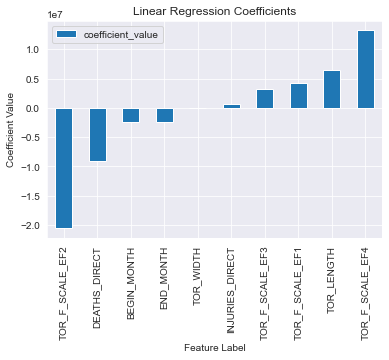

In [18]:
# Implement Multiple Linear Regression

# Create a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the target
y_pred = lr.predict(X_test)

# Get feature coefficients and plot values 
coef_values = {lr.feature_names_in_[i]: lr.coef_[i] \
               for i in range(len(lr.feature_names_in_))} 
coefs = pd.DataFrame.from_dict(
        coef_values, 
        orient="index", 
        columns=["coefficient_value"]).sort_values(by="coefficient_value")

# Plot coefficient values for each of the features
coefs.plot(kind="bar")
plt.title("Linear Regression Coefficients") 
plt.xlabel("Feature Label")

plt.ylabel("Coefficient Value")

# Generate the MSE and coefficient of determination for the model
print("The MSE is", mean_squared_error(y_test, y_pred))
print("The coefficient of determination is", round(lr.score(X_test, y_test), 2))

The last algorithm we implemented was a multiple linear regression. We used the same features as in the other models, and we tested and evaluated model performance using MSE and coefficient of determination again. The MSE value was once again very large (3.02e+16) — indeed, larger than both of the other models tested. The coefficient of determination was low as well (0.09), indicating that the multiple linear regression was not a good fit for the data. This suggested that the model was not the best choice for predicting tornado damages based on the input features. 

Additionally, based on analysis of the feature coefficients, the most influential features were F scale ratings of 4 (positive correlation value) and 2 (negative correlation value).    

Taking all three algorithms that we implemented into account, we conclude that the best algorithm was the Random Forest Regressor, specifically with 50 trees. Although the K Neighbors Regressor with 2 neighbors had the highest coefficient of determination with 0.9998, the Random Forest Regressor with 50 trees had both the second-highest coefficient of determination of 0.9996 and the smallest MSE of 29,143,515,948,750.00.

The r-squared value being as close to 1 as it is signifies that the data is a considerably good fit for the model. Additionally, although the MSE is considerably large, the fact that the Random Forest Regressor with 50 trees has the smallest MSE signifies that the estimated values for property damage from tornadoes best resemble the actual values in the data relative to this model.